## Data Product: Income inequality in the United States

### Claim:  Income inequality in the United States has increased significantly over the years.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
import sklearn as sk
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Gini Index

Gini Index is one of the most popular measures of Income Inequality. 

The Gini coefficient incorporates the detailed shares data into a single statistic, which summarizes the dispersion of income across the entire income distribution. The Gini coefficient ranges from 0, indicating perfect equality (where everyone receives an equal share), to 1, perfect inequality (where only one recipient or group of recipients receives all the income). The Gini is based on the difference between the Lorenz curve (the observed cumulative income distribution) and the notion of a perfectly equal income distribution.


### Exploring change in Gini Index over the Years in USA

The dataset is from 
https://www.statista.com/statistics/219643/gini-coefficient-for-us-individuals-families-and-households/   
1. It has Gini computed for U.S. households from 1990 to 2016. Information is contained in two columns Unnamed:1, Unnamed: 2, but it has it in different data formats and there are columns and rows with redundant information. So we cleaned the data, before plotting it further.

In [45]:
Gini=pd.ExcelFile('Gini.xlsx') # reading the excel files

In [46]:
Gini=pd.read_excel(Gini,'Data')

In [47]:
Gini.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,"U.S. household income distribution 1990-2016, ...",NaN
1,NaN,U.S. household income distribution from 1990 t...,NaN
2,NaN,NaN,Gini coefficient*
3,NaN,'90,0.43
4,NaN,'91,0.43


The header is the third row and data starts from fourth row. The unnmaed column:0 is just NANs. Hence, removing it.

In [48]:
Gini=Gini.iloc[3:]

In [49]:
Gini.drop('Unnamed: 0',axis=1,inplace=True)

In [50]:
Gini.rename(columns={'Unnamed: 1':'Year','Unnamed: 2':'Gini_Index'}, inplace=True)

In [51]:
Gini.dtypes # character strings appear as object data types

Year          object
Gini_Index    object
dtype: object

 Converting Gini column to numeric 

In [52]:
Gini['Gini_Index']=pd.to_numeric(Gini['Gini_Index'])

Stripping unwanted punctuations from date values and making it as proper values.

In [53]:
Gini['Year']=Gini['Year'].apply(lambda x : x.strip("'`"))

Converting year into date time objects

In [54]:
Gini['Year']=Gini['Year'].apply(lambda x : int(x))

In [55]:
Gini['Year']=Gini['Year'].apply(lambda x : (1900+x) if x/10 ==9 else (2000+x))

File on which plot will be made to show gini trend across years.

In [56]:
Gini.to_csv('Gini inequality.csv')

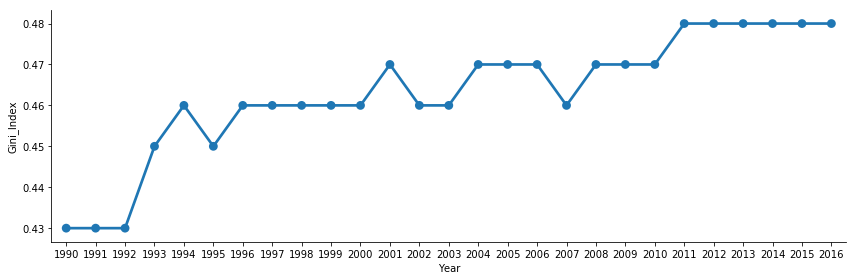

In [57]:
sns.factorplot(x='Year',y='Gini_Index',data=Gini,aspect=3)

The graph shows an increasing trend of Gini Index, though the increase is not too much in the last few years. 
We wanted to explore the various factors that contributed to this gini coefficient i.e. the overall income disparities in the united states

### For Exploratory data analysis we start with following dimensions

1. Earnings over years by gender
2. Unemployment over years by race
3. Tax rates over years


We want to explore the hypothesis that each of these factors have an impact on income gaps. 

### 1. Earnings over years by gender

Validity: Gender wage gaps directly contribute to income inequality, and higher gaps in labor force participation rates between men and women result in inequality of earnings between sexes, thus creating and exacerbating income inequality.
https://www.weforum.org/agenda/2015/10/why-gender-and-income-inequality-are-linked/

The dataset is from https://www.bls.gov/news.release/wkyeng.t01.htm

The data given is Gender wise median weekly earnings for each quarter. We are choosing the following columns for the explanatory data analysis:
1. Year and Quarter - Data has been summarized for each quarter in the source itself
2. Median Weekly earnings In current dollars Men. 
3. Median Weekly earnings In current dollars Women.

In [58]:
gender=pd.ExcelFile('Gender_Pay_Quarterly.xlsx')

In [59]:
gender=pd.read_excel(gender)

In [60]:
gender.head()

,Year and quarter,Number of workers (in thousands) Total,Number of workers (in thousands) Men,Number of workers (in thousands) Women,Median weekly earnings In current dollars Total $,Median weekly earnings In current dollars Men $,Median weekly earnings In current dollars Women $,Median weekly earnings In constant (1982-84) dollars Total $,Median weekly earnings In constant (1982-84) dollars Men $,Median weekly earnings In constant (1982-84) dollars Women $
0,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009Q1,101683.0,56302.0,45381.0,732.0,815.0,645.0,345.0,384.0,304.0
2,2009Q2,99996.0,55233.0,44763.0,737.0,818.0,652.0,345.0,383.0,305.0
3,2009Q3,99050.0,54481.0,44569.0,742.0,820.0,664.0,345.0,381.0,309.0
4,2009Q4,98555.0,54410.0,44145.0,747.0,823.0,666.0,344.0,379.0,307.0


In [61]:
gender.columns

Index([u'Year and quarter', u'Number of workers (in thousands) Total',
       u'Number of workers (in thousands) Men',
       u'Number of workers (in thousands) Women',
       u'Median weekly earnings In current dollars Total $',
       u'Median weekly earnings In current dollars Men $',
       u'Median weekly earnings In current dollars Women $',
       u'Median weekly earnings In constant (1982-84) dollars Total $',
       u'Median weekly earnings In constant (1982-84) dollars Men $',
       u'Median weekly earnings In constant (1982-84) dollars Women $'],
      dtype='object')

Dropping the NA's from the data frame.

In [62]:
gender = gender.dropna()

Creating a new Year column to group men and women median weekly earnings in dollars

In [63]:
gender['Year']=gender['Year and quarter'].apply(lambda x: x[0:4])

Grouped by year

In [64]:
groupedbyYear = gender.groupby('Year')[['Median weekly earnings In current dollars Men $',\
                                        'Median weekly earnings In current dollars Women $']].mean().reset_index()

Creating a new dataframe for men earnings seperately

In [65]:
men=groupedbyYear.copy()

In [66]:
men['category'] = 'male'

In [67]:
men.rename(columns = {'Median weekly earnings In current dollars Men $':'Earnings_Per_thousand'}, inplace = True)

In [68]:
men.head()

,Year,Earnings_Per_thousand,Median weekly earnings In current dollars Women $,category
0,2009,819.00,656.75,male
1,2010,824.25,669.75,male
2,2011,831.25,683.25,male
3,2012,853.75,690.75,male
4,2013,860.75,705.50,male


In [69]:
men.drop(['Median weekly earnings In current dollars Women $'],axis=1,inplace=True)

Creating a new dataframe for women earnings seperately

In [70]:
women=groupedbyYear.copy()

In [71]:
women['category'] = 'female'

In [72]:
women.rename(columns = {'Median weekly earnings In current dollars Women $':'Earnings_Per_thousand'}, inplace = True)

In [73]:
women.drop(['Median weekly earnings In current dollars Men $'],axis=1,inplace=True)

In [74]:
women.head()

,Year,Earnings_Per_thousand,category
0,2009,656.75,female
1,2010,669.75,female
2,2011,683.25,female
3,2012,690.75,female
4,2013,705.50,female


Appending male and female dataframes to plot

In [75]:
final1 = men.append(women)

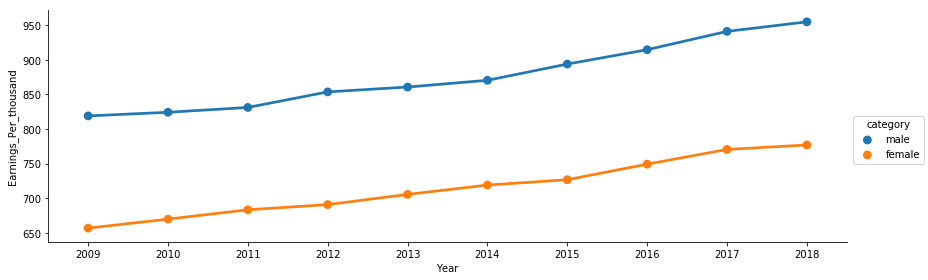

In [76]:
sns.factorplot(x = 'Year', y = 'Earnings_Per_thousand', data = final1, hue = 'category', aspect = 3)

The graph shows that the gap between men and women's median salary has not decreased over the years. Ideally, the gap has widened a bit. This is depicted in the next plot.

In [77]:
groupedbyYear['Men - Women median weekly earnings']=groupedbyYear['Median weekly earnings In current dollars Men $']-groupedbyYear['Median weekly earnings In current dollars Women $']

In [78]:
groupedbyYear.tail()

,Year,Median weekly earnings In current dollars Men $,Median weekly earnings In current dollars Women $,Men - Women median weekly earnings
5,2014,870.50,719.00,151.50
6,2015,894.00,726.75,167.25
7,2016,914.75,749.25,165.50
8,2017,941.25,770.50,170.75
9,2018,955.00,777.00,178.00


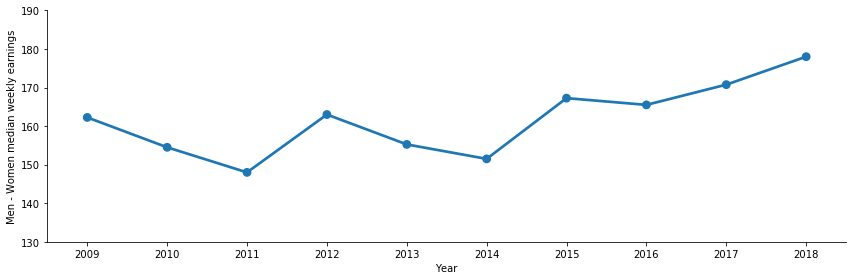

In [79]:
g=sns.factorplot(x='Year',y='Men - Women median weekly earnings',data=groupedbyYear,aspect=3)
g.set(ylim=(130, 190))

The above plot shows a clear gender pay disparity(The difference between the male and female median income) which has increased over the number of years. Women's pay has increased although it is still considerably lower as compared to men. This indicates the income disparity still exists which contributes the gini index. 

### 2. Correlation of Gini and Unemployment Rate, and further analysis by Race

Unemployment and inequality are closely related to each other. When considered from a larger point of view, unemployment is the reason and inequality is the outcome.
http://www.economywatch.com/unemployment/in-equality.html

The dataset for unemployment rate is
https://www.bls.gov/charts/state-employment-and-unemployment/state-unemployment-rates-map.htm#

Columns in the dataset:
1. Month from 1998 to 2008
2. Total Employment Rate
3. Men(20 years and over) Employment Rate
4. Women(20 years and over) Employment Rate
5. White Employment Rate
6. Black or African American Employment Rate
7. Asian Employment Rate	
8. Hispanic or Latino Employment Rate

Here we are focussing on employment discrimination based on race in addition to total employment rate. Hence dropping men and women unemployment rate.

In [80]:
Unemp=pd.ExcelFile('Umemp.xlsx')

In [81]:
Unemp_race=pd.read_excel(Unemp,'Sheet3')

In [82]:
Unemp_race.head()

,Month,Total,"Men, 20 years and over","Women, 20 years and over",16 to 19 years old,White,Black or African American,Asian,Hispanic or Latino
0,1998-04-01 00:00:00,4.3,3.5,4.0,13.5,3.7,9.1,NaN,6.7
1,1998-05-01 00:00:00,4.4,3.6,3.9,14.8,3.8,8.9,NaN,6.9
2,1998-06-01 00:00:00,4.5,3.7,4.0,14.9,3.9,8.8,NaN,7.4
3,1998-07-01 00:00:00,4.5,3.9,3.9,14.6,3.8,9.5,NaN,7.3
4,1998-08-01 00:00:00,4.5,3.7,4.0,14.7,3.9,8.8,NaN,7.4


In [83]:
dtype(Unemp_race.iloc[0,6])

dtype('float64')

Converting string to date time object.

In [84]:
Unemp_race['Date']=pd.to_datetime(Unemp_race['Month'],errors='coerce')

In [85]:
Unemp_race.head()

,Month,Total,"Men, 20 years and over","Women, 20 years and over",16 to 19 years old,White,Black or African American,Asian,Hispanic or Latino,Date
0,1998-04-01 00:00:00,4.3,3.5,4.0,13.5,3.7,9.1,NaN,6.7,1998-04-01
1,1998-05-01 00:00:00,4.4,3.6,3.9,14.8,3.8,8.9,NaN,6.9,1998-05-01
2,1998-06-01 00:00:00,4.5,3.7,4.0,14.9,3.9,8.8,NaN,7.4,1998-06-01
3,1998-07-01 00:00:00,4.5,3.9,3.9,14.6,3.8,9.5,NaN,7.3,1998-07-01
4,1998-08-01 00:00:00,4.5,3.7,4.0,14.7,3.9,8.8,NaN,7.4,1998-08-01


In [86]:
df=Unemp_race.copy()

Dropping the men and women unemployment rates because it is a known fact that rates will always be different.

In [87]:
df.drop(['Men, 20 years and over','Women, 20 years and over','16 to 19 years old','Month'],axis=1,inplace=True)

In [88]:
df.dropna(axis=0,inplace=True)

To group by year, picking year from the date column

In [89]:
df['Year']=df['Date'].apply(lambda x:int(x.year))

In [90]:
dfW=df.copy()

Making new dataframes for each racial category and binding it together.

In [91]:
dfW['Race']='White'

In [92]:
dfW.drop(['Black or African American','Hispanic or Latino','Asian'],axis=1,inplace=True)

In [93]:
dfW.rename(columns={'White':'UnemploymentRate'},inplace=True)

In [94]:
dfB=df.copy()

In [95]:
dfB['Race']='BlackorAfricanAmerican'

In [96]:
dfB.drop(['Hispanic or Latino','Asian','White'],axis=1,inplace=True)

In [97]:
dfB.rename(columns={'Black or African American':'UnemploymentRate'},inplace=True)

In [98]:
dfA=df.copy()

In [99]:
dfA['Race']='Asian'

In [100]:
dfA.drop(['Black or African American','Hispanic or Latino','White'],axis=1,inplace=True)

In [101]:
dfA.rename(columns={'Asian':'UnemploymentRate'},inplace=True)

In [102]:
dfH=df.copy()

In [103]:
dfH['Race']='Hispanic'

In [104]:
dfH.drop(['Black or African American','Asian','White'],axis=1,inplace=True)

In [105]:
dfH.rename(columns={'Hispanic or Latino':'UnemploymentRate'},inplace=True)

In [106]:
dftotal=dfW.append([dfH,dfA,dfB])

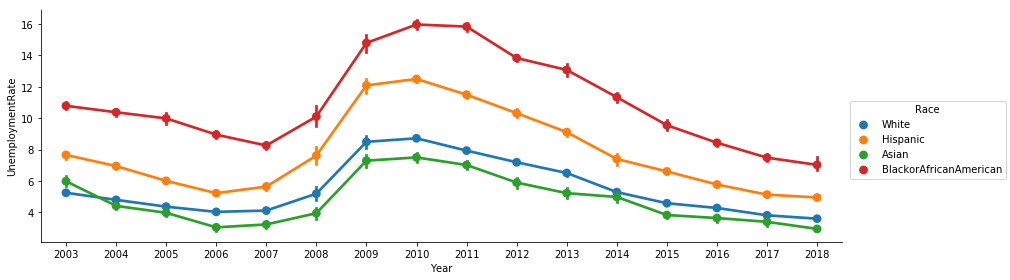

In [107]:
sns.factorplot(x='Year',y='UnemploymentRate',hue='Race',data=dftotal,aspect=3)

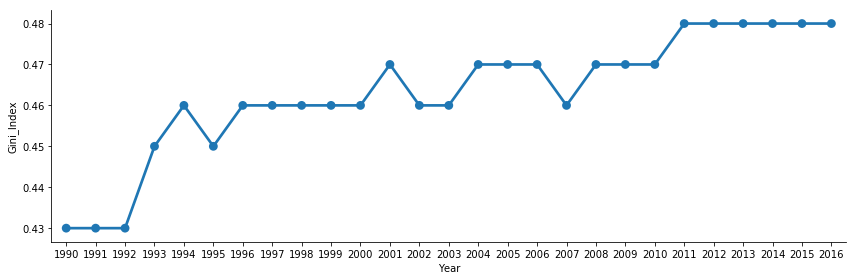

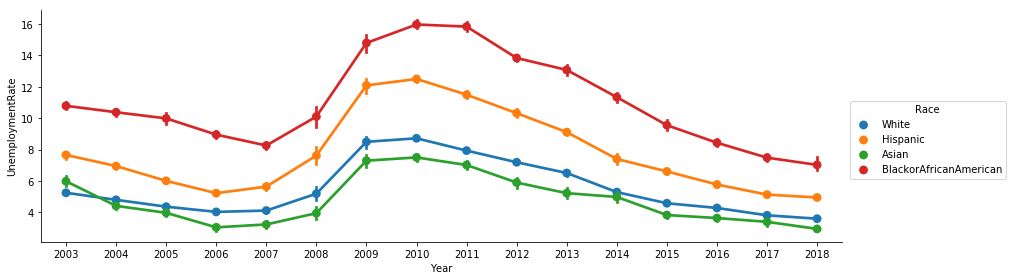

In [108]:
sns.factorplot(x='Year',y='Gini_Index',data=Gini,aspect=3)
sns.factorplot(x='Year',y='UnemploymentRate',hue='Race',data=dftotal,aspect=3)

There is a huge gap in the unemployment rates between people belonging to different races. This variation might contribute to the general gini index.
Also, if we compare this graph with the gini graph plotted over years, we can see that after 2011, gini index has started reducing to some extent. And in this chart, the unemployment rate overall has also started decreasing post 2011. So, we can explore further to see if there is any correlation between unemployment rate and gini index

In [109]:
dftotal.head()

,Total,UnemploymentRate,Date,Year,Race
57,5.8,5.2,2003-01-01,2003,White
58,5.9,5.1,2003-02-01,2003,White
59,5.9,5.1,2003-03-01,2003,White
60,6.0,5.3,2003-04-01,2003,White
61,6.1,5.4,2003-05-01,2003,White


In [110]:
Unemp_Annual = dftotal.groupby('Year')['Total'].mean()

In [111]:
Unemp_Annual1=Unemp_Annual.to_frame()

In [112]:
Unemp_Annual1.head()

,Total
Year,
2003,5.991667
2004,5.541667
2005,5.083333
2006,4.608333
2007,4.616667


In [113]:
Unemp_Annual1.reset_index(level=0,inplace=True)

In [114]:
Unemp_Annual1.rename(columns={'Total':'UnemploymentRate'},inplace=True)

In [115]:
MergedData=Unemp_Annual1.merge(Gini)

In [116]:
MergedData

,Year,UnemploymentRate,Gini_Index
0,2003,5.991667,0.46
1,2004,5.541667,0.47
2,2005,5.083333,0.47
3,2006,4.608333,0.47
4,2007,4.616667,0.46
5,2008,5.800000,0.47
6,2009,9.283333,0.47
7,2010,9.608333,0.47
8,2011,8.933333,0.48
9,2012,8.075000,0.48


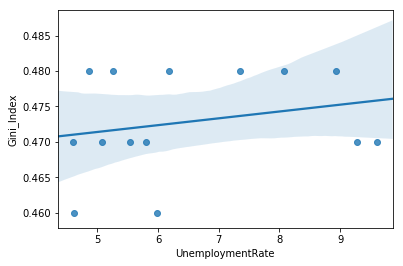

In [117]:
sns.regplot(x='UnemploymentRate',y='Gini_Index',data=MergedData)

### 4. Correlation of Gini and tax

Validity: How tax affects gini and income inequality - https://www.brookings.edu/articles/which-states-tax-laws-widen-inequality/

In [136]:
df_tax = pd.read_csv('State_Taxes_and_Fees_Collected__Beginning_Fiscal_Year_Ending_March_31__1995.csv')

The above data shows the tax information per year for every category. This data is used for analysis further.
The attributes which we choose for our analysis are Fiscal Year Ended, Amount Collected and Tax Category

In [121]:
df_tax.head()

,Fiscal Year Ended,Tax Category,Tax or Fee,Amount Collected,Tax or Fee Sort Order
0,2015,Personal Income,Personal Income Tax,$43709833323,1
1,2015,Corporation and Business,Business Corporations Article 9-A,$2969705402,2
2,2015,Corporation and Business,"Foreign Corporation Licenses, Article 9, Secti...",$26511684,3
3,2015,Corporation and Business,"Transportation, Transmission, Article 9, Secti...",$11037395,4
4,2015,Corporation and Business,"Transportation, Transmission, Article 9, Secti...",$36521507,5


Data Cleaning

In [122]:
df_tax.columns = df_tax.columns.str.replace('\s+', '_')

In [123]:
df_tax = df_tax[(df_tax['Tax_or_Fee'] =='Total State Taxes and Fees Collected by the Department of Taxation and Finance')|(df_tax['Tax_or_Fee']=='Personal Income Tax')]

In [124]:
df_tax.sort_values(['Tax_or_Fee','Fiscal_Year_Ended'])[:5]

,Fiscal_Year_Ended,Tax_Category,Tax_or_Fee,Amount_Collected,Tax_or_Fee_Sort_Order
1100,1995,Personal Income,Personal Income Tax,$17589489166,1
1045,1996,Personal Income,Personal Income Tax,$16998212766,1
991,1997,Personal Income,Personal Income Tax,$16370887332,1
935,1998,Personal Income,Personal Income Tax,$17758697181,1
880,1999,Personal Income,Personal Income Tax,$20662375214,1


Replacing the dollar sign from the Amount_Collected column

In [125]:
df_tax['Amount_Collected']=pd.to_numeric(df_tax.Amount_Collected.str.replace('$',''))

In [126]:
df_tax.head()

,Fiscal_Year_Ended,Tax_Category,Tax_or_Fee,Amount_Collected,Tax_or_Fee_Sort_Order
0,2015,Personal Income,Personal Income Tax,43709833323,1
54,2015,Total,Total State Taxes and Fees Collected by the De...,68103753958,55
55,2014,Personal Income,Personal Income Tax,42960774915,1
109,2014,Total,Total State Taxes and Fees Collected by the De...,66865866363,55
110,2013,Personal Income,Personal Income Tax,40226714989,1


In [127]:
df_tax['Amount_Collected'] =  (df_tax.Amount_Collected/1000000).round(2)

Loading Gini dataset for further analysis.

In [130]:
df_gini = pd.read_csv('Gini_cs.csv')

In [131]:
df_gini.columns

Index([u'Unnamed: 0', u'Year', u'Gini_Index'], dtype='object')

#### Merging the tax data with gini data to analyze if there is any correlation between tax amount collected and increasing gini over years

In [132]:
df_GiniTax = df_tax.merge(df_gini, left_on='Fiscal_Year_Ended', right_on='Year')

In [133]:
df_GiniTax.head()

,Fiscal_Year_Ended,Tax_Category,Tax_or_Fee,Amount_Collected,Tax_or_Fee_Sort_Order,Unnamed: 0,Year,Gini_Index
0,2015,Personal Income,Personal Income Tax,43709.83,1,28,2015,0.48
1,2015,Total,Total State Taxes and Fees Collected by the De...,68103.75,55,28,2015,0.48
2,2014,Personal Income,Personal Income Tax,42960.77,1,27,2014,0.48
3,2014,Total,Total State Taxes and Fees Collected by the De...,66865.87,55,27,2014,0.48
4,2013,Personal Income,Personal Income Tax,40226.71,1,26,2013,0.48


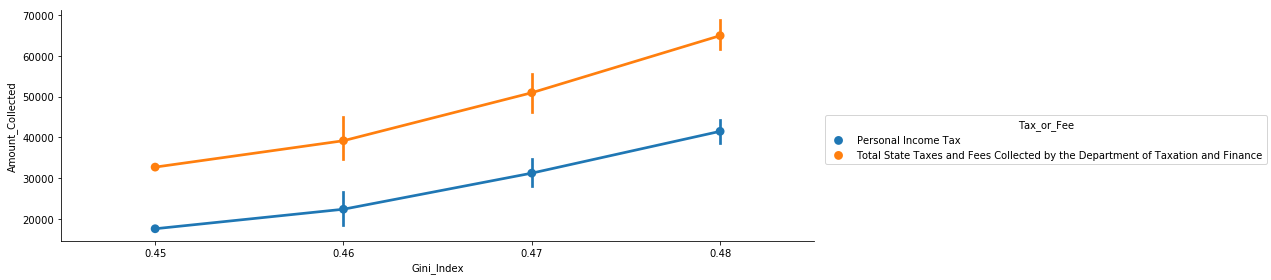

In [134]:
sns.factorplot(x='Gini_Index', y='Amount_Collected',data=df_GiniTax, hue='Tax_or_Fee',aspect=3)

#### Data Visualization Insight 2: There seems to  be an obvious correlation between Gini_index and Amount_Collected. We can see that gini is high tax amount collected is also high. This is true for personal income tax also and total state taxes and fees collected. To validate our finding we plotted the following.

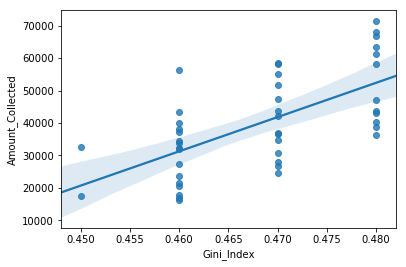

In [135]:
sns.regplot(x='Gini_Index', y='Amount_Collected', data=df_GiniTax)

#### As we can say above the correlation seen above can be validated with the above regression plot as we can see a straight correlation between Gini_index and Amount Collected.